In [70]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

# 导入NumPy函数库，一般都是用这样的形式(包括别名np，几乎是约定俗成的)
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time
import scipy
from scipy.optimize import leastsq
from scipy import stats
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
from scipy.interpolate import BarycentricInterpolator
from scipy.interpolate import CubicSpline
import math
# import seaborn

In [71]:
def residual(t, x, y):
    return y - (t[0] * x ** 2 + t[1] * x + t[2])

In [72]:
def residual2(t, x, y):
    print t[0], t[1]
    return y - (t[0]*np.sin(t[1]*x) + t[2])

In [73]:
# x ** x        x > 0
# (-x) ** (-x)  x < 0
def f(x):
    y = np.ones_like(x)
    i = x > 0
    y[i] = np.power(x[i], x[i])
    i = x < 0
    y[i] = np.power(-x[i], -x[i])
    return y

In [74]:
if __name__ == "__main__":
    # # 开场白：
    # numpy是非常好用的数据包，如：可以这样得到这个二维数组
    # [[ 0  1  2  3  4  5]
    #  [10 11 12 13 14 15]
    #  [20 21 22 23 24 25]
    #  [30 31 32 33 34 35]
    #  [40 41 42 43 44 45]
    #  [50 51 52 53 54 55]]
    a = np.arange(0, 60, 10).reshape((-1, 1)) + np.arange(6)
    print a

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


In [75]:
    # 正式开始  -:)
    # 标准Python的列表(list)中，元素本质是对象。
    # 如：L = [1, 2, 3]，需要3个指针和三个整数对象，对于数值运算比较浪费内存和CPU。
    # 因此，Numpy提供了ndarray(N-dimensional array object)对象：存储单一数据类型的多维数组。

    # 1.使用array创建
    # 通过array函数传递list对象
    L = [1, 2, 3, 4, 5, 6]
    # print "L = ", L
    a = np.array(L)
    print "a = ", a
    # print type(a), type(L)
    # 若传递的是多层嵌套的list，将创建多维数组
    b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
    print b

a =  [1 2 3 4 5 6]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [76]:
    # # # #
    # # # # # 数组大小可以通过其shape属性获得
    print a.shape
    print b.shape

(6,)
(3, 4)


In [77]:
    # # # # 也可以强制修改shape
    b.shape = 4, 3
    print b

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [78]:
    # # # # # 注：从(3,4)改为(4,3)并不是对数组进行转置，而只是改变每个轴的大小，数组元素在内存中的位置并没有改变
    # # # #
    # # # 当某个轴为-1时，将根据数组元素的个数自动计算此轴的长度
    b.shape = 2, -1
    print b
    print b.shape

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
(2, 6)


In [79]:
    # # # #
    # b.shape = 3, 4
    print b

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]


In [80]:
    # # # # 使用reshape方法，可以创建改变了尺寸的新数组，原数组的shape保持不变
    c = b.reshape((4, -1))
    print "b = \n", b
    print 'c = \n', c

b = 
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
c = 
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [81]:
    # # #
    # # # # 数组b和c共享内存，修改任意一个将影响另外一个
    b[0][1] = 20
    print "b = \n", b
    print "c = \n", c

b = 
[[ 1 20  3  4  5  6]
 [ 7  8  9 10 11 12]]
c = 
[[ 1 20  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [82]:
    # # # # 数组的元素类型可以通过dtype属性获得
    print a.dtype
    print b.dtype

int64
int64


In [83]:
    # # # # # 可以通过dtype参数在创建时指定元素类型
    d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], dtype=np.float)
    f = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]], dtype=np.complex)
    print d
    print f

[[  1.   2.   3.   4.]
 [  5.   6.   7.   8.]
 [  9.  10.  11.  12.]]
[[  1.+0.j   2.+0.j   3.+0.j   4.+0.j]
 [  5.+0.j   6.+0.j   7.+0.j   8.+0.j]
 [  9.+0.j  10.+0.j  11.+0.j  12.+0.j]]


In [84]:
    # # # 如果更改元素类型，可以使用astype安全的转换
    f = d.astype(np.int)
    print f

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [85]:
    # # # 但不要强制仅修改元素类型，如下面这句，将会以int来解释单精度float类型
    d.dtype = np.int
    print d

[[4607182418800017408 4611686018427387904 4613937818241073152
  4616189618054758400]
 [4617315517961601024 4618441417868443648 4619567317775286272
  4620693217682128896]
 [4621256167635550208 4621819117588971520 4622382067542392832
  4622945017495814144]]


In [86]:
    # 2.使用函数创建
    # 如果生成一定规则的数据，可以使用NumPy提供的专门函数
    # arange函数类似于python的range函数：指定起始值、终止值和步长来创建数组
    # 和Python的range类似，arange同样不包括终值；但arange可以生成浮点类型，而range只能是整数类型
    a = np.arange(1, 10, 0.5)
    print a

[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.
  8.5  9.   9.5]


In [87]:
    # # # # linspace函数通过指定起始值、终止值和元素个数来创建数组，缺省包括终止值
    b = np.linspace(1, 10, 10)
    print 'b = ', b

b =  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


In [88]:
    # # 可以通过endpoint关键字指定是否包括终值
    c = np.linspace(1, 10, 10, endpoint=False)
    print 'c = ', c

c =  [ 1.   1.9  2.8  3.7  4.6  5.5  6.4  7.3  8.2  9.1]


In [89]:
    # # # 和linspace类似，logspace可以创建等比数列
    # # 下面函数创建起始值为10^1，终止值为10^2，有10个数的等比数列
    d = np.logspace(1, 2, 9, endpoint=True)
    print d

[  10.           13.33521432   17.7827941    23.71373706   31.6227766
   42.16965034   56.23413252   74.98942093  100.        ]


In [90]:
    # # # # 下面创建起始值为2^0，终止值为2^10(包括)，有10个数的等比数列
    f = np.logspace(0, 10, 11, endpoint=True, base=2)
    print f

[  1.00000000e+00   2.00000000e+00   4.00000000e+00   8.00000000e+00
   1.60000000e+01   3.20000000e+01   6.40000000e+01   1.28000000e+02
   2.56000000e+02   5.12000000e+02   1.02400000e+03]


In [91]:
    # # # # 使用 frombuffer, fromstring, fromfile等函数可以从字节序列创建数组
    s = 'abcdz'
    g = np.fromstring(s, dtype=np.int8)
    print g

[ 97  98  99 100 122]


In [92]:
    # 3.存取
    # 3.1常规办法：数组元素的存取方法和Python的标准方法相同
    a = np.arange(10)
    print a

[0 1 2 3 4 5 6 7 8 9]


In [93]:
    # # # 获取某个元素
    print a[3]

3


In [94]:
    # # # # # 切片[3,6)，左闭右开
    print a[3:6]

[3 4 5]


In [95]:
    # # 省略开始下标，表示从0开始
    print a[:5]

[0 1 2 3 4]


In [96]:
    # # 下标为负表示从后向前数
    print a[3:]

[3 4 5 6 7 8 9]


In [97]:
    # # 步长为2
    print a[1:9:2]

[1 3 5 7]


In [98]:
    # # # # # 步长为-1，即翻转
    print a[::-1]

[9 8 7 6 5 4 3 2 1 0]


In [99]:
    # # # # # 切片数据是原数组的一个视图，与原数组共享内容空间，可以直接修改元素值
    a[1:4] = 10, 20, 30
    print a

[ 0 10 20 30  4  5  6  7  8  9]


In [100]:
    # # 因此，在实践中，切实注意原始数据是否被破坏，如：
    b = a[2:5]
    b[0] = 200
    print a

[  0  10 200  30   4   5   6   7   8   9]


In [101]:
    # 3.2 整数/布尔数组存取
    # 3.2.1
    # 根据整数数组存取：当使用整数序列对数组元素进行存取时，
    # 将使用整数序列中的每个元素作为下标，整数序列可以是列表(list)或者数组(ndarray)。
    # 使用整数序列作为下标获得的数组不和原始数组共享数据空间。
    a = np.logspace(0, 9, 10, base=2)
    print a

[   1.    2.    4.    8.   16.   32.   64.  128.  256.  512.]


In [102]:
    i = np.arange(0, 10, 2)
    print i

[0 2 4 6 8]


In [103]:
    # # 利用i取a中的元素
    b = a[i]
    print b

[   1.    4.   16.   64.  256.]


In [104]:
    # # b的元素更改，a中元素不受影响
    b[2] = 1.6
    print b
    print a

[   1.     4.     1.6   64.   256. ]
[   1.    2.    4.    8.   16.   32.   64.  128.  256.  512.]


In [105]:
    # # 3.2.2
    # 使用布尔数组i作为下标存取数组a中的元素：返回数组a中所有在数组b中对应下标为True的元素
    # 生成10个满足[0,1)中均匀分布的随机数
    a = np.random.rand(10)
    print a

[ 0.77946211  0.35274463  0.14142636  0.99701894  0.00238968  0.27608183
  0.3035286   0.32416875  0.61940618  0.53198216]


In [106]:
    # # 大于0.5的元素索引
    print a > 0.5

[ True False False  True False False False False  True  True]


In [107]:
    # # 大于0.5的元素
    b = a[a > 0.5]
    print b

[ 0.77946211  0.99701894  0.61940618  0.53198216]


In [108]:
    # # 将原数组中大于0.5的元素截取成0.5
    a[a > 0.5] = 0.5
    print a
    # # # # b不受影响
    print b

[ 0.5         0.35274463  0.14142636  0.5         0.00238968  0.27608183
  0.3035286   0.32416875  0.5         0.5       ]
[ 0.77946211  0.99701894  0.61940618  0.53198216]


In [109]:
    # 3.3 二维数组的切片
    # [[ 0  1  2  3  4  5]
    #  [10 11 12 13 14 15]
    #  [20 21 22 23 24 25]
    #  [30 31 32 33 34 35]
    #  [40 41 42 43 44 45]
    #  [50 51 52 53 54 55]]
    a = np.arange(0, 60, 10)    # 行向量
    print 'a = ', a

a =  [ 0 10 20 30 40 50]


In [110]:
    b = a.reshape((-1, 1))      # 转换成列向量
    print b

[[ 0]
 [10]
 [20]
 [30]
 [40]
 [50]]


In [111]:
    c = np.arange(6)
    print c

[0 1 2 3 4 5]


In [112]:
    f = b + c   # 行 + 列
    print f

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


In [113]:
    # # 合并上述代码：
    a = np.arange(0, 60, 10).reshape((-1, 1)) + np.arange(6)
    print a

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


In [114]:
    # # 二维数组的切片
    print a[[0, 1, 2], [2, 3, 4]]
    print a[4, [2, 3, 4]]
    print a[4:, [2, 3, 4]]
    i = np.array([True, False, True, False, False, True])
    print a[i]
    print a[i, 3]

[ 2 13 24]
[42 43 44]
[[42 43 44]
 [52 53 54]]
[[ 0  1  2  3  4  5]
 [20 21 22 23 24 25]
 [50 51 52 53 54 55]]
[ 3 23 53]


In [115]:
    # 4.1 numpy与Python数学库的时间比较
    for j in np.logspace(0, 7, 10):
        j = int(j)
        x = np.linspace(0, 10, j)
        start = time.clock()
        y = np.sin(x)
        t1 = time.clock() - start

        x = x.tolist()
        start = time.clock()
        for i, t in enumerate(x):
            x[i] = math.sin(t)
        t2 = time.clock() - start
        print j, ": ", t1, t2, t2/t1

1 :  9.99999999962e-06 1.90000000018e-05 1.90000000025
5 :  1.89999999982e-05 3.8e-05 2.00000000019
35 :  1.80000000007e-05 3.50000000005e-05 1.94444444439
215 :  2.80000000004e-05 0.000158000000003 5.64285714288
1291 :  8.70000000006e-05 0.001005 11.5517241378
7742 :  0.000428999999997 0.005998 13.9813519815
46415 :  0.002427 0.036637 15.0955912649
278255 :  0.015704 0.260613 16.5953260316
1668100 :  0.066702 0.863032 12.9386225301
10000000 :  0.423521 4.810752 11.3589456013


In [116]:
    # 4.2 元素去重
    # 4.2.1直接使用库函数
    a = np.array((1, 2, 3, 4, 5, 5, 7, 3, 2, 2, 8, 8))
    print '原始数组：', a

原始数组： [1 2 3 4 5 5 7 3 2 2 8 8]


In [117]:
    # # # 使用库函数unique
    b = np.unique(a)
    print '去重后：', b

去重后： [1 2 3 4 5 7 8]


In [118]:
    # # # 4.2.2 二维数组的去重，结果会是预期的么？
    c = np.array(((1, 2), (3, 4), (5, 6), (1, 3), (3, 4), (7, 6)))
    print u'二维数组：\n', c
    print '去重后：', np.unique(c)

二维数组：
[[1 2]
 [3 4]
 [5 6]
 [1 3]
 [3 4]
 [7 6]]
去重后： [1 2 3 4 5 6 7]


In [119]:
    # # # 4.2.3 方案1：转换为虚数
    r, i = np.split(c, (1, ), axis=1)
    x = r + i * 1j
    x = c[:, 0] + c[:, 1] * 1j
    print '转换成虚数：', x
    print '虚数去重后：', np.unique(x)
    print np.unique(x, return_index=True)   # 思考return_index的意义
    idx = np.unique(x, return_index=True)[1]
    print '二维数组去重：\n', c[idx]

转换成虚数： [ 1.+2.j  3.+4.j  5.+6.j  1.+3.j  3.+4.j  7.+6.j]
虚数去重后： [ 1.+2.j  1.+3.j  3.+4.j  5.+6.j  7.+6.j]
(array([ 1.+2.j,  1.+3.j,  3.+4.j,  5.+6.j,  7.+6.j]), array([0, 3, 1, 2, 5]))
二维数组去重：
[[1 2]
 [1 3]
 [3 4]
 [5 6]
 [7 6]]


In [120]:
    # # 4.2.3 方案2：利用set
    print '去重方案2：\n', np.array(list(set([tuple(t) for t in c])))

去重方案2：
[[1 2]
 [5 6]
 [7 6]
 [1 3]
 [3 4]]


In [121]:
    # 4.3 stack and axis
    a = np.arange(1, 10).reshape((3, 3))
    b = np.arange(11, 20).reshape((3, 3))
    c = np.arange(101, 110).reshape((3, 3))
    print 'a = \n', a
    print 'b = \n', b
    print 'c = \n', c
    print 'axis = 0 \n', np.stack((a, b, c), axis=0)
    print 'axis = 1 \n', np.stack((a, b, c), axis=1)
    print 'axis = 2 \n', np.stack((a, b, c), axis=2)

a = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
b = 
[[11 12 13]
 [14 15 16]
 [17 18 19]]
c = 
[[101 102 103]
 [104 105 106]
 [107 108 109]]
axis = 0 
[[[  1   2   3]
  [  4   5   6]
  [  7   8   9]]

 [[ 11  12  13]
  [ 14  15  16]
  [ 17  18  19]]

 [[101 102 103]
  [104 105 106]
  [107 108 109]]]
axis = 1 
[[[  1   2   3]
  [ 11  12  13]
  [101 102 103]]

 [[  4   5   6]
  [ 14  15  16]
  [104 105 106]]

 [[  7   8   9]
  [ 17  18  19]
  [107 108 109]]]
axis = 2 
[[[  1  11 101]
  [  2  12 102]
  [  3  13 103]]

 [[  4  14 104]
  [  5  15 105]
  [  6  16 106]]

 [[  7  17 107]
  [  8  18 108]
  [  9  19 109]]]


In [122]:
    a = np.arange(1, 10).reshape(3,3)
    print a
    b = a + 10
    print b
    print np.dot(a, b)
    print a * b

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[11 12 13]
 [14 15 16]
 [17 18 19]]
[[ 90  96 102]
 [216 231 246]
 [342 366 390]]
[[ 11  24  39]
 [ 56  75  96]
 [119 144 171]]


In [123]:
    a = np.arange(1, 10)
    print a
    b = np.arange(20,25)
    print b
    print np.concatenate((a, b))

[1 2 3 4 5 6 7 8 9]
[20 21 22 23 24]
[ 1  2  3  4  5  6  7  8  9 20 21 22 23 24]


(51,)
x = 
[-3.   -2.88 -2.76 -2.64 -2.52 -2.4  -2.28 -2.16 -2.04 -1.92 -1.8  -1.68
 -1.56 -1.44 -1.32 -1.2  -1.08 -0.96 -0.84 -0.72 -0.6  -0.48 -0.36 -0.24
 -0.12  0.    0.12  0.24  0.36  0.48  0.6   0.72  0.84  0.96  1.08  1.2
  1.32  1.44  1.56  1.68  1.8   1.92  2.04  2.16  2.28  2.4   2.52  2.64
  2.76  2.88  3.  ]
(51,)
y = 
[ 0.00443185  0.00630673  0.00884645  0.01223153  0.0166701   0.02239453
  0.02965458  0.03870686  0.04980009  0.06315656  0.07895016  0.09728227
  0.1181573   0.14145997  0.16693704  0.19418605  0.2226535   0.25164434
  0.28034381  0.30785126  0.3332246   0.35553253  0.37391061  0.38761662
  0.39608021  0.39894228  0.39608021  0.38761662  0.37391061  0.35553253
  0.3332246   0.30785126  0.28034381  0.25164434  0.2226535   0.19418605
  0.16693704  0.14145997  0.1181573   0.09728227  0.07895016  0.06315656
  0.04980009  0.03870686  0.02965458  0.02239453  0.0166701   0.01223153
  0.00884645  0.00630673  0.00443185]


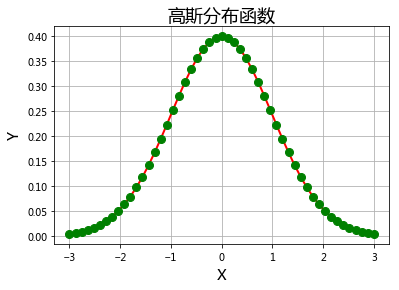

In [124]:
    # 5.绘图
    # 5.1 绘制正态分布概率密度函数
    # mpl.rcParams['font.sans-serif'] = [u'SimHei']  #FangSong/黑体 FangSong/KaiTi
    # mpl.rcParams['axes.unicode_minus'] = False
    mu = 0
    sigma = 1
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 51)
    y = np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) / (math.sqrt(2 * math.pi) * sigma)
    print x.shape
    print 'x = \n', x
    print y.shape
    print 'y = \n', y
    # plt.plot(x, y, 'ro-', linewidth=2)
    plt.figure(facecolor='w')
    plt.plot(x, y, 'r-', x, y, 'go', linewidth=2, markersize=8)
    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    plt.title(u'高斯分布函数', fontsize=18)
    plt.grid(True)
    plt.show()

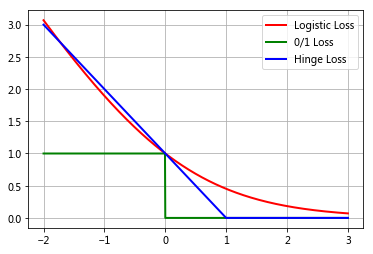

In [125]:
    # # 5.2 损失函数：Logistic损失(-1,1)/SVM Hinge损失/ 0/1损失
    x = np.array(np.linspace(start=-2, stop=3, num=1001, dtype=np.float))
    y_logit = np.log(1 + np.exp(-x)) / math.log(2)
    y_boost = np.exp(-x)
    y_01 = x < 0
    y_hinge = 1.0 - x
    y_hinge[y_hinge < 0] = 0
    plt.plot(x, y_logit, 'r-', label='Logistic Loss', linewidth=2)
    plt.plot(x, y_01, 'g-', label='0/1 Loss', linewidth=2)
    plt.plot(x, y_hinge, 'b-', label='Hinge Loss', linewidth=2)
    # plt.plot(x, y_boost, 'm--', label='Adaboost Loss', linewidth=2)
    plt.grid()
    plt.legend(loc='upper right')
    # plt.savefig('1.png')
    plt.show()

In [132]:
# x ** x        x > 0
# (-x) ** (-x)  x < 0
def f(x):
    y = np.ones_like(x)
    i = x > 0
    y[i] = np.power(x[i], x[i])
    i = x < 0
    y[i] = np.power(-x[i], -x[i])
    return y

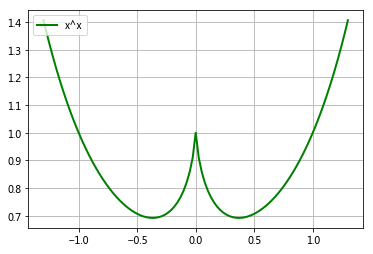

In [134]:
    # 5.3 x^x
    x = np.linspace(-1.3, 1.3, 101)
    y = f(x)
    plt.plot(x, y, 'g-', label='x^x', linewidth=2)
    plt.grid()
    plt.legend(loc='upper left')
    plt.show()

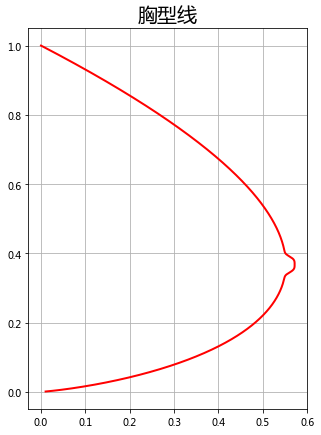

In [135]:
    # # 5.4 胸型线
    x = np.arange(1, 0, -0.001)
    y = (-3 * x * np.log(x) + np.exp(-(40 * (x - 1 / np.e)) ** 4) / 25) / 2
    plt.figure(figsize=(5,7), facecolor='w')
    plt.plot(y, x, 'r-', linewidth=2)
    plt.grid(True)
    plt.title(u'胸型线', fontsize=20)
    # plt.savefig('breast.png')
    plt.show()

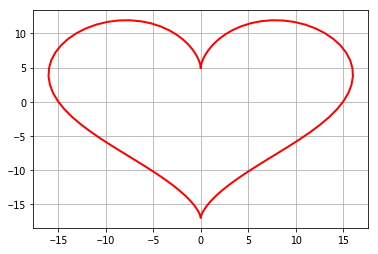

In [136]:
    # 5.5 心形线
    t = np.linspace(0, 2*np.pi, 100)
    x = 16 * np.sin(t) ** 3
    y = 13 * np.cos(t) - 5 * np.cos(2*t) - 2 * np.cos(3*t) - np.cos(4*t)
    plt.plot(x, y, 'r-', linewidth=2)
    plt.grid(True)
    plt.show()

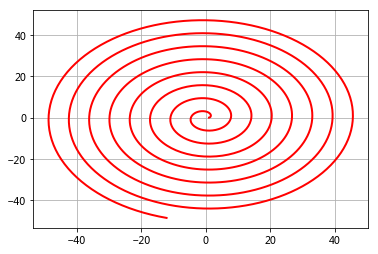

In [137]:
    # # 5.6 渐开线
    t = np.linspace(0, 50, num=1000)
    x = t*np.sin(t) + np.cos(t)
    y = np.sin(t) - t*np.cos(t)
    plt.plot(x, y, 'r-', linewidth=2)
    plt.grid()
    plt.show()

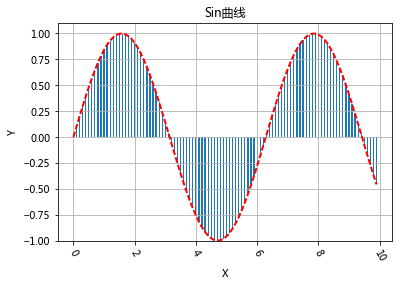

In [138]:
    # # Bar
    x = np.arange(0, 10, 0.1)
    y = np.sin(x)
    plt.bar(x, y, width=0.04, linewidth=0.2)
    plt.plot(x, y, 'r--', linewidth=2)
    plt.title(u'Sin曲线')
    plt.xticks(rotation=-60)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.show()

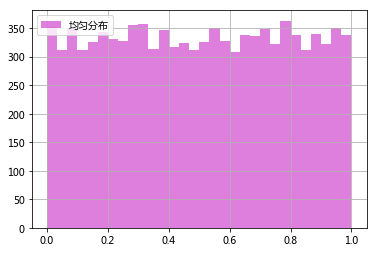

In [139]:
    # # 6. 概率分布
    # # 6.1 均匀分布
    x = np.random.rand(10000)
    t = np.arange(len(x))
    plt.hist(x, 30, color='m', alpha=0.5, label=u'均匀分布')
    # plt.plot(t, x, 'r-', label=u'均匀分布')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

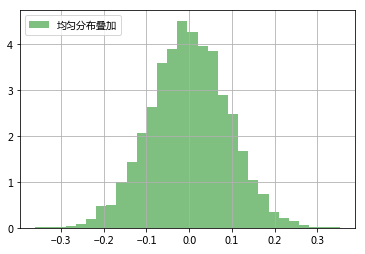

In [140]:
    # # 6.2 验证中心极限定理
    t = 1000
    a = np.zeros(10000)
    for i in range(t):
        a += np.random.uniform(-5, 5, 10000)
    a /= t
    plt.hist(a, bins=30, color='g', alpha=0.5, normed=True, label=u'均匀分布叠加')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

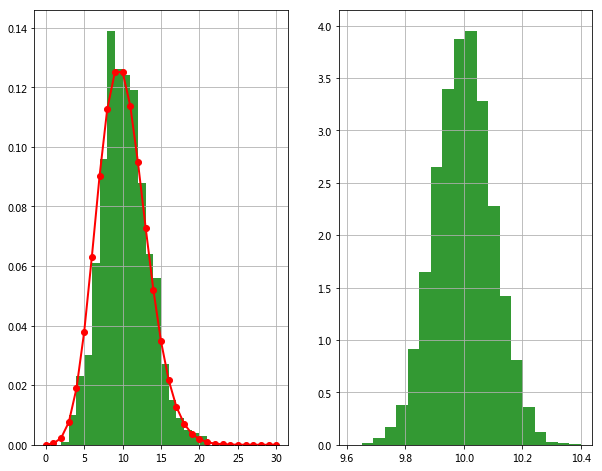

In [141]:
    # 6.21 其他分布的中心极限定理
    lamda = 10
    p = stats.poisson(lamda)
    y = p.rvs(size=1000)
    mx = 30
    r = (0, mx)
    bins = r[1] - r[0]
    plt.figure(figsize=(10, 8), facecolor='w')
    plt.subplot(121)
    plt.hist(y, bins=bins, range=r, color='g', alpha=0.8, normed=True)
    t = np.arange(0, mx+1)
    plt.plot(t, p.pmf(t), 'ro-', lw=2)
    plt.grid(True)

    N = 1000
    M = 10000
    plt.subplot(122)
    a = np.zeros(M, dtype=np.float)
    p = stats.poisson(lamda)
    for i in np.arange(N):
        y = p.rvs(size=M)
        a += y
    a /= N
    plt.hist(a, bins=20, color='g', alpha=0.8, normed=True)
    plt.grid(b=True)
    plt.show()

[5 3 9 ..., 4 7 5]


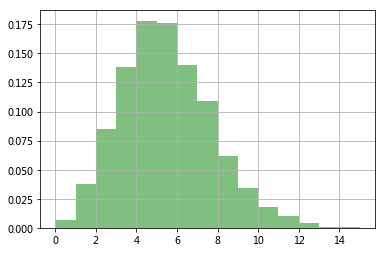

(array([ 0.00670067,  0.03740374,  0.08460846,  0.13841384,  0.17811781,
        0.1760176 ,  0.14021402,  0.10891089,  0.06180618,  0.03430343,
        0.01760176,  0.010001  ,  0.00410041,  0.00110011,  0.00070007]), array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.]), <a list of 15 Patch objects>)
1.0


In [142]:
    # # 6.3 Poisson分布
    x = np.random.poisson(lam=5, size=10000)
    print x
    pillar = 15
    a = plt.hist(x, bins=pillar, normed=True, range=[0, pillar], color='g', alpha=0.5)
    plt.grid()
    plt.show()
    print a
    print a[0].sum()

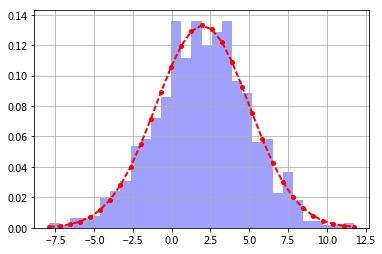

In [144]:
    # # 6.4 直方图的使用
    mu = 2
    sigma = 3
    data = mu + sigma * np.random.randn(1000)
    h = plt.hist(data, 30, normed=1, color='#a0a0ff')
    x = h[1]
    y = norm.pdf(x, loc=mu, scale=sigma)
    plt.plot(x, y, 'r--', x, y, 'ro', linewidth=2, markersize=4)
    plt.grid()
    plt.show()

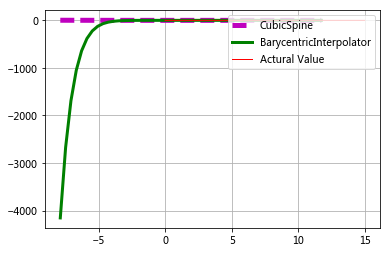

In [145]:
    # # 6.5 插值
    rv = poisson(5)
    x1 = a[1]
    y1 = rv.pmf(x1)
    itp = BarycentricInterpolator(x1, y1)  # 重心插值
    x2 = np.linspace(x.min(), x.max(), 50)
    y2 = itp(x2)
    cs = scipy.interpolate.CubicSpline(x1, y1)       # 三次样条插值
    plt.plot(x2, cs(x2), 'm--', linewidth=5, label='CubicSpine')           # 三次样条插值
    plt.plot(x2, y2, 'g-', linewidth=3, label='BarycentricInterpolator')   # 重心插值
    plt.plot(x1, y1, 'r-', linewidth=1, label='Actural Value')             # 原始值
    plt.legend(loc='upper right')
    plt.grid()
    plt.show()

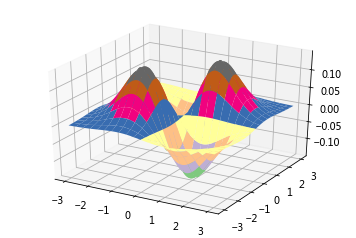

In [147]:
    # 7. 绘制三维图像
    x, y = np.ogrid[-3:3:100j, -3:3:100j]
    # u = np.linspace(-3, 3, 101)
    # x, y = np.meshgrid(u, u)
    z = x*y*np.exp(-(x**2 + y**2)/2) / math.sqrt(2*math.pi)
    # z = x*y*np.exp(-(x**2 + y**2)/2) / math.sqrt(2*math.pi)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.coolwarm, linewidth=0.1)  #
    ax.plot_surface(x, y, z, rstride=5, cstride=5, cmap=cm.Accent, linewidth=0.5)
    plt.show()
    # cmaps = [('Perceptually Uniform Sequential',
    #           ['viridis', 'inferno', 'plasma', 'magma']),
    #          ('Sequential', ['Blues', 'BuGn', 'BuPu',
    #                          'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd',
    #                          'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu',
    #                          'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']),
    #          ('Sequential (2)', ['afmhot', 'autumn', 'bone', 'cool',
    #                              'copper', 'gist_heat', 'gray', 'hot',
    #                              'pink', 'spring', 'summer', 'winter']),
    #          ('Diverging', ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr',
    #                         'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral',
    #                         'seismic']),
    #          ('Qualitative', ['Accent', 'Dark2', 'Paired', 'Pastel1',
    #                           'Pastel2', 'Set1', 'Set2', 'Set3']),
    #          ('Miscellaneous', ['gist_earth', 'terrain', 'ocean', 'gist_stern',
    #                             'brg', 'CMRmap', 'cubehelix',
    #                             'gnuplot', 'gnuplot2', 'gist_ncar',
    #                             'nipy_spectral', 'jet', 'rainbow',
    #                             'gist_rainbow', 'hsv', 'flag', 'prism'])]


真实值： 2 3 -1
预测值： [ 1.98456583  2.98912701 -0.60646233]


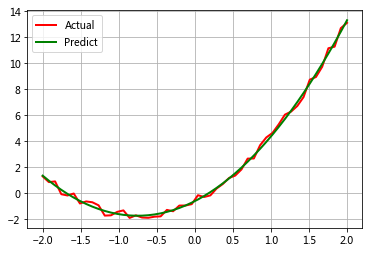

In [148]:
    # 8.1 scipy
    # 线性回归例1
    x = np.linspace(-2, 2, 50)
    A, B, C = 2, 3, -1
    y = (A * x ** 2 + B * x + C) + np.random.rand(len(x))*0.75

    t = leastsq(residual, [0, 0, 0], args=(x, y))
    theta = t[0]
    print '真实值：', A, B, C
    print '预测值：', theta
    y_hat = theta[0] * x ** 2 + theta[1] * x + theta[2]
    plt.plot(x, y, 'r-', linewidth=2, label=u'Actual')
    plt.plot(x, y_hat, 'g-', linewidth=2, label=u'Predict')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

3 5
3.0 5.0
3.0 5.0
3.0000000447 5.0
3.0 5.00000007451
3.0 5.0
-0.425221773894 5.01144240519
-0.425221767557 5.01144240519
-0.425221773894 5.01144247986
-0.425221773894 5.01144240519
-0.42051559836 4.90068390233
-0.42051559836 4.90068390233
-0.42051559836 4.90068390233
-0.422905194217 4.9556185593
-0.422905187915 4.9556185593
-0.422905194217 4.95561863315
-0.422905194217 4.9556185593
-0.431650376036 4.99743171798
-0.430637332903 4.97549025029
-0.430637326486 4.97549025029
-0.430637332903 4.97549032443
-0.430637332903 4.97549025029
-0.43119426932 4.96150939427
-0.431462828048 4.9682302964
-0.431462821619 4.9682302964
-0.431462828048 4.96823037043
-0.431462828048 4.9682302964
-0.431831701374 4.97419661317
-0.431687826169 4.9708672535
-0.431687819736 4.9708672535
-0.431687826169 4.97086732758
-0.431687826169 4.9708672535
-0.431661911941 4.96957659174
-0.431675827707 4.96990712709
-0.431695966851 4.97039732765
-0.431695960418 4.97039732765
-0.431695966851 4.97039740172
-0.431695966851 4.97

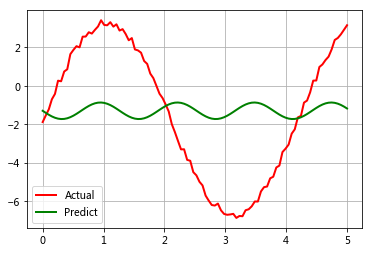

In [149]:
    # # 线性回归例2
    x = np.linspace(0, 5, 100)
    a = 5
    w = 1.5
    phi = -2
    y = a * np.sin(w*x) + phi + np.random.rand(len(x))*0.5

    t = leastsq(residual2, [3, 5, 1], args=(x, y))
    theta = t[0]
    print '真实值：', a, w, phi
    print '预测值：', theta
    y_hat = theta[0] * np.sin(theta[1] * x) + theta[2]
    plt.plot(x, y, 'r-', linewidth=2, label='Actual')
    plt.plot(x, y_hat, 'g-', linewidth=2, label='Predict')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()

In [151]:
    # # 8.2 使用scipy计算函数极值
    a = opt.fmin(f, 1)
    b = opt.fmin_cg(f, 1)
    c = opt.fmin_bfgs(f, 1)
    print a, 1/a, math.e
    print b
    print c

    # marker	description
    # ”.”	point
    # ”,”	pixel
    # “o”	circle
    # “v”	triangle_down
    # “^”	triangle_up
    # “<”	triangle_left
    # “>”	triangle_right
    # “1”	tri_down
    # “2”	tri_up
    # “3”	tri_left
    # “4”	tri_right
    # “8”	octagon
    # “s”	square
    # “p”	pentagon
    # “*”	star
    # “h”	hexagon1
    # “H”	hexagon2
    # “+”	plus
    # “x”	x
    # “D”	diamond
    # “d”	thin_diamond
    # “|”	vline
    # “_”	hline
    # TICKLEFT	tickleft
    # TICKRIGHT	tickright
    # TICKUP	tickup
    # TICKDOWN	tickdown
    # CARETLEFT	caretleft
    # CARETRIGHT	caretright
    # CARETUP	caretup
    # CARETDOWN	caretdown

Optimization terminated successfully.
         Current function value: 0.692201
         Iterations: 16
         Function evaluations: 32
Optimization terminated successfully.
         Current function value: 0.692201
         Iterations: 4
         Function evaluations: 30
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.692201
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8
[ 0.36787109] [ 2.71834351] 2.71828182846
[ 0.36787948]
[ 0.36787942]
